In [1]:
### Apply the tools of machine learning to predict whether passengers survived or not.
# Install python packages
#!python3 -m pip install pandas numpy seaborn matplotlib scikit-learn xgboost

In [2]:
## Step1
# Importing necessary libraries

# Data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Confusion Matrix,Precision, Recall, and Accuracy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


# Load the training and test datasets
#The training dataset includes passengers survival status along with other features like sex, fare and pclass used to create the machine learning model.
#The test dataset would be used to see how well the model predicts passenger survival status on unseen data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
## Step2: Exploratory Data Analysis
# Display the first few rows of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get a summary of the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Get descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get a summary of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


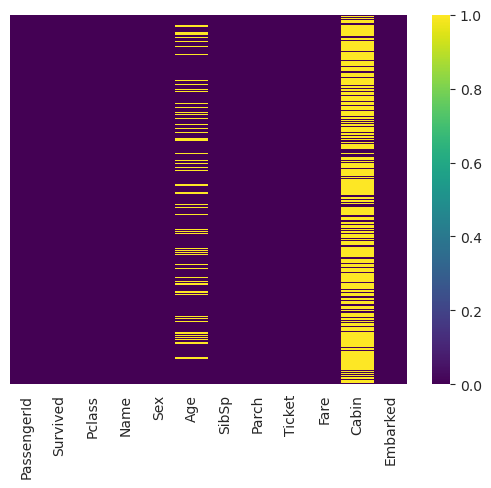

In [7]:
# Explore missing data in training data set 
ax = sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

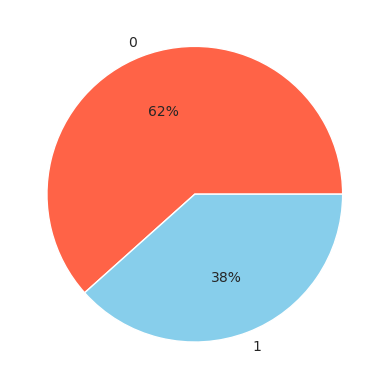

In [8]:
# Number of Passenger survived or dead 
ax = train.groupby('Survived').size().plot(kind='pie', autopct='%1.0f%%',colors=['tomato', 'skyblue'])
plt.show()

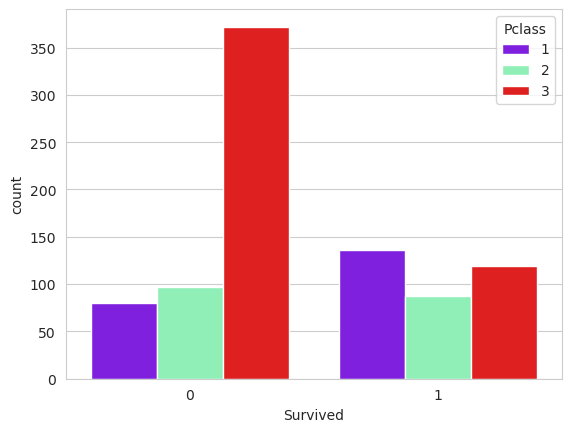

In [9]:
# vizualise Passenger Class Vs Survival Rate to see if the class of the passenger impacts the survival rate or not:
ax = sns.countplot(x = "Survived", hue = "Pclass", data = train, palette='rainbow')
plt.show()

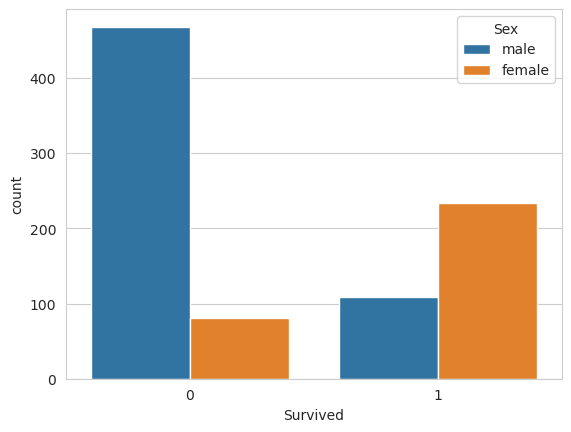

In [10]:
# vizualise Sex Vs Survival Rate to see if the Sex of the passenger impacts the survival rate or not:
ax = sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

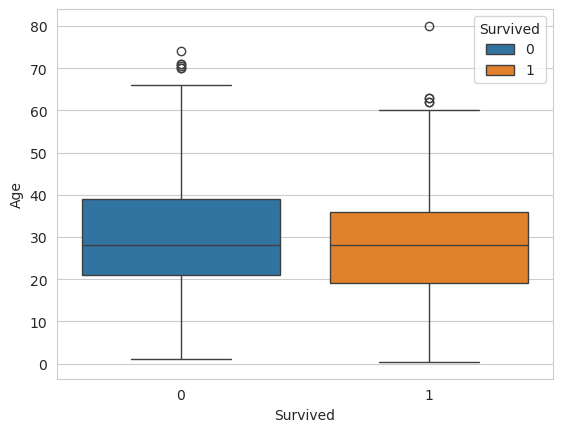

In [11]:
# Checking if the age of the passengers affects the survival rate of the passenger.
ax = sns.boxplot(x="Survived",y="Age",data=train, hue="Survived")
plt.show()

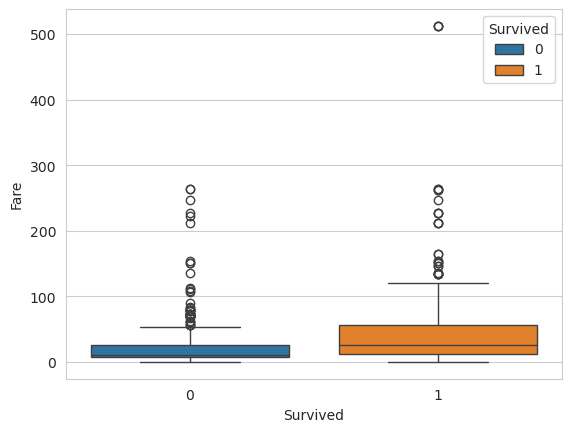

In [12]:
# Checking if the amount of money each passenger paid for their ticket affects the survival rate of the passenger.
ax = sns.boxplot(x="Survived",y="Fare",data=train, hue="Survived")
plt.show()

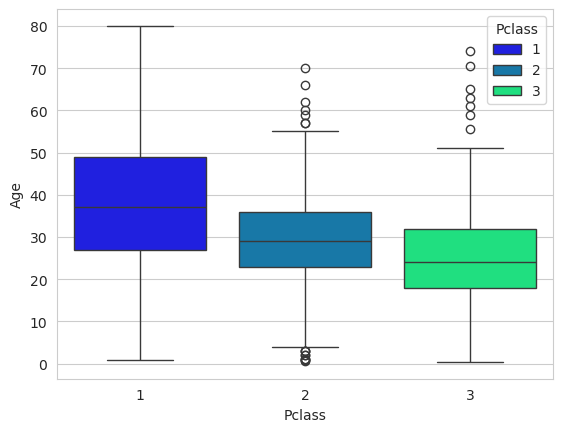

In [13]:
# Visualize Age of the passengers by boarding class
ax = sns.boxplot(x='Pclass',y='Age',data=train,palette='winter', hue='Pclass')
plt.show()

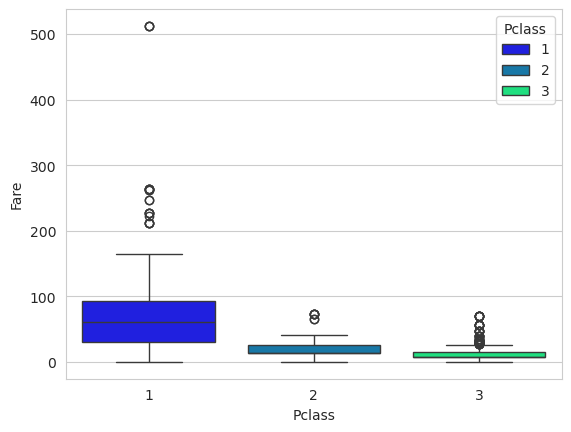

In [14]:
# Visualize Fare of the passengers by boarding class
ax = sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter', hue='Pclass')
plt.show()

In [15]:
## Step3: Data Processing; handling missing values and converting categorical features to numerical ones.
# Fill missing values for the 'Age' feature with the mean age grouped by passenger class
avg_first = round(train["Age"][train["Pclass"]==1].mean(),0)
avg_second = round(train["Age"][train["Pclass"]==2].mean(),0)
avg_third = round(train["Age"][train["Pclass"]==3].mean(),0)

def replaceNA(cols):
    Age = cols["Age"]
    Pclass = cols["Pclass"]
    if pd.isnull(Age):
        if Pclass == 1:
            return avg_first
        elif Pclass == 2:
            return avg_second
        else:
            return avg_third
    else:
        return Age

train['Age'] = train.apply(replaceNA, axis = 1)
test['Age'] = test.apply(replaceNA, axis = 1)

# Fill missing values for the 'Embarked' feature with the most common port
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Fill missing values for the 'Fare' feature in the test set with the median fare
test['Fare'] = test['Fare'].fillna(test['Fare'][train["Pclass"]==3].median())

# Convert 'Sex' feature to numerical
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' feature to numerical
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Replace all NA/NAN/missing values of Cabin with 0 (Passenger had no cabin number) and rest of the values by 1 (Passenger had a cabin)
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

for dataset in [train, test]:
    for i in range(len(dataset)):
        if(dataset.at[i,"Cabin"]!=0):
            dataset.at[i,"Cabin"]=1

train["Cabin"] = train["Cabin"].astype("int64", errors='ignore')
test["Cabin"] = test["Cabin"].astype("int64", errors='ignore')

In [16]:
## Step 4: Feature Engineering
# Create a new feature,'Title' from 'Names' 
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5}

for dataset in [train, test]:
    # Extract titles
    dataset['Title'] = dataset["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)
    
    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Ms','Dona','Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme','Lady','Countess'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Jonkheer', 'Major', 'Rev', 'Col', 'Don', 'Sir'], 'Mr')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

# Create a new feature 'Family' from 'SibSp' and 'Parch'
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

# Create a new feature 'IsAlone'
train['IsAlone'] = np.where(train['Family'] > 1, 0, 1)
test['IsAlone'] = np.where(test['Family'] > 1, 0, 1)

# Drop features
train.drop(['PassengerId', 'Ticket','SibSp','Parch'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket','SibSp','Parch'], axis=1, inplace=True)
train


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family,IsAlone
0,0,3,0,22.0,7.2500,0,2,1,2,0
1,1,1,1,38.0,71.2833,1,0,3,2,0
2,1,3,1,26.0,7.9250,0,2,2,1,1
3,1,1,1,35.0,53.1000,1,2,3,2,0
4,0,3,0,35.0,8.0500,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,2,1,1,1
887,1,1,1,19.0,30.0000,1,2,2,1,1
888,0,3,1,25.0,23.4500,0,2,2,4,0
889,1,1,0,26.0,30.0000,1,0,1,1,1


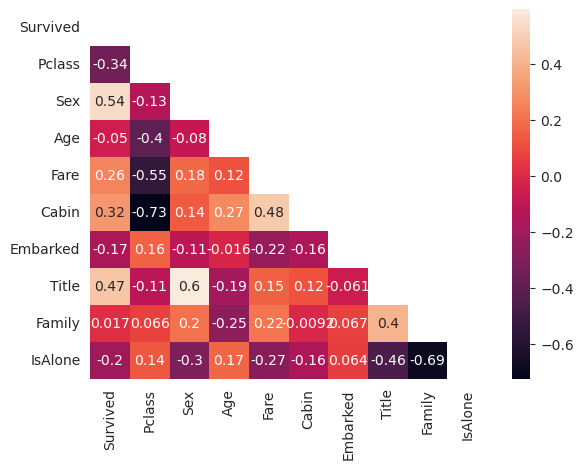

In [17]:
mask = np.zeros_like(train.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask
ax = sns.heatmap(train.corr(),mask=mask,annot=True)
plt.grid(False)
plt.show()

In [18]:
##Step 5: Select and Train a Model
# Prepare the data for training
X = train.drop(['Survived'], axis=1)
y = train['Survived']
X = scaler.fit_transform(X)
test = scaler.transform(test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

result = []

# Make a list of classfiers
classifiers = [KNeighborsClassifier(3),
               LogisticRegression(random_state=1),
               DecisionTreeClassifier(),
               SVC(kernel='rbf',probability=True),
               RandomForestClassifier(n_estimators=100, random_state=42),
               GaussianNB(),
               XGBClassifier()]

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = cls.predict(X_val)
    
    # Evaluate the model
    val_acc = round(accuracy_score(y_val,y_pred), 2)
    f1score = round(f1_score(y_val,y_pred), 2)
    precision = round(precision_score(y_val,y_pred), 2)
    recall = round(recall_score(y_val,y_pred), 2)
    
    # Getting the probabilities of our predictions
    y_scores = cls.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train,  y_scores)
    auc = round(roc_auc_score(y_train, y_scores), 2)
    predictions = confusion_matrix(y_val, np.array(y_pred))
    
    result.append({'classifiers':cls.__class__.__name__,
                                        'Accuracy':val_acc,
                                        'Precision':precision,
                                        'Recall':recall,
                                        'F1_score':f1score,
                                        'FalsePositiveRate':np.round(fpr,2), 
                                        'TruePositiveRate':np.round(tpr,2), 
                                        'AreaUnderCurve':auc,
                                        'ValDatascore':y_pred,
                                        'Predictions': predictions})


df = pd.DataFrame(result)
df.set_index('classifiers', inplace=True)
df

,Accuracy,Precision,Recall,F1_score,FalsePositiveRate,TruePositiveRate,AreaUnderCurve,ValDatascore,Predictions
classifiers,,,,,,,,,
KNeighborsClassifier,0.80,0.78,0.73,0.76,"[0.0, 0.0, 0.08, 0.32, 1.0]","[0.0, 0.53, 0.8, 0.99, 1.0]",0.95,"[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[[90, 15], [20, 54]]"
LogisticRegression,0.82,0.78,0.78,0.78,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0....","[0.0, 0.0, 0.16, 0.16, 0.2, 0.2, 0.21, 0.21, 0...",0.87,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[[89, 16], [16, 58]]"
DecisionTreeClassifier,0.78,0.72,0.74,0.73,"[0.0, 0.0, 0.0, 0.02, 0.03, 0.04, 0.05, 1.0]","[0.0, 0.94, 0.96, 0.99, 0.99, 1.0, 1.0, 1.0]",1.00,"[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[84, 21], [19, 55]]"
SVC,0.82,0.80,0.76,0.78,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.02, 0.02, 0.02, 0.03, 0.21, 0.21,...",0.87,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[[91, 14], [18, 56]]"
RandomForestClassifier,0.83,0.79,0.78,0.79,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.25, 0.26, 0.35, 0.37, 0.41, 0.42, 0.44...",1.00,"[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[90, 15], [16, 58]]"
GaussianNB,0.78,0.73,0.76,0.74,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0....","[0.0, 0.01, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04...",0.85,"[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...","[[84, 21], [18, 56]]"
XGBClassifier,0.80,0.75,0.78,0.77,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.01, 0.09, 0.1, 0.34, 0.35, 0.38, ...",1.00,"[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...","[[86, 19], [16, 58]]"


In [19]:
##Step 6: Fine-Tune the Model
#We use grid search to find the best hyperparameters for the model.

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=20, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found by grid search: {best_params}')

# Train the classifier with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation set accuracy after tuning: {accuracy:.2f}')



Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100}
Validation set accuracy after tuning: 0.83


In [20]:
##Step 7: Predict
#Finally, we use the trained model to predict the outcomes on the test set.

# Predict on the test set
test_pred = best_clf.predict(test)
test_pred


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,